### Team Member

*   Simaa Abumousa
*   Eyab Ghafre


In this notebook we create Price Prediction Project for ['Diamonds dataset'](https://www.kaggle.com/competitions/shai-club/data) .

<div id='content'></div>

## Index of Content

* [**1.0 Importing the Laibraries**](#1.0)
* [**2.0 Read the Data**](#Chapter2)
* [**3.0 Take a Quick Look at the Data Structure**](#Chapter3)
* [**4.0 Cleaning Data**](#Chapter4)
 * [4.1 Drop zero value in x,y,z DataSet](#4.1)
 * [4.2 Drow Some Plot Numerical Data](#4.2)
 * [4.3 Drop the OutLiers](#4.3)
 * [4.4 Drow Some Plot Categorical Data](#4.4)
* [**5.0 Discover and Visualize the Data to Gain Insights**](#Chapter5)
 * [5.1 Stratified Split](#5.1)
 * [5.2 New Features in DataSet](#5.2)
* [**6.0 Prepare the Data for Machine Learning Algorithms**](#Chapter6)
 * [6.1 Handling Text and Categorical Attributes](#6.1)
 * [6.2 Looking for Correlations](#6.2)
 * [6.3 Data Scaling](#6.3)
* [**7.0 Select and Train a Model**](#7.0)
 * [7.1 Linear Regression model](#7.1)
 * [7.2 Linear model](#7.2)
 * [7.3 Lasso model](#7.3)
 * [7.4 Decision Tree Regressor model](#7.4)
 * [7.5 Random Forest Regressor model](#7.5)
* [**8.0 Fine-Tune Your Model**](#8.0)
* [**9.0 Evaluate Your System on the Test Set**](#9.0)

<a id='1.0'></a>

## 1.0 Importing the Libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import csv

<div id='Chapter2'></div>

## 2.0 Read the Data

In [2]:
train_df=pd.read_csv('../input/shai-club/train.csv')
train_df.head()

,Id,carat,cut,color,clarity,depth,table,price,x,y,z
0,1,1.06,Ideal,I,SI2,61.8,57.0,4270,6.57,6.60,4.07
1,2,1.51,Premium,G,VVS2,60.9,58.0,15164,7.38,7.42,4.51
2,3,0.32,Ideal,F,VS2,61.3,56.0,828,4.43,4.41,2.71
3,4,0.53,Ideal,G,VS2,61.2,56.0,1577,5.19,5.22,3.19
4,5,0.70,Premium,H,VVS2,61.0,57.0,2596,5.76,5.72,3.50


In [3]:
test_df=pd.read_csv('../input/shai-club/test.csv')
test_df.head()

,Id,carat,cut,color,clarity,depth,table,x,y,z
0,1,0.34,Ideal,G,VVS2,61.1,57.0,4.52,4.48,2.75
1,2,0.71,Premium,E,VS2,62.7,58.0,5.74,5.68,3.58
2,3,0.44,Very Good,I,VS1,62.8,56.0,4.83,4.88,3.05
3,4,0.81,Premium,E,SI2,60.1,59.0,6.09,6.03,3.65
4,5,0.40,Ideal,G,VVS1,61.2,56.0,4.74,4.80,2.92


<div id='Chapter3'></div>

## 3.0 Take a Quick Look at the Data Structure

In [4]:
diamond=pd.read_csv('../input/shai-club/train.csv')

In [5]:
diamond.info()
#no null value

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 43152 entries, 0 to 43151
Data columns (total 11 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Id       43152 non-null  int64  
 1   carat    43152 non-null  float64
 2   cut      43152 non-null  object 
 3   color    43152 non-null  object 
 4   clarity  43152 non-null  object 
 5   depth    43152 non-null  float64
 6   table    43152 non-null  float64
 7   price    43152 non-null  int64  
 8   x        43152 non-null  float64
 9   y        43152 non-null  float64
 10  z        43152 non-null  float64
dtypes: float64(6), int64(2), object(3)
memory usage: 3.6+ MB


In [6]:
diamond.isnull().sum()

Id         0
carat      0
cut        0
color      0
clarity    0
depth      0
table      0
price      0
x          0
y          0
z          0
dtype: int64

In [7]:
diamond.describe()

,Id,carat,depth,table,price,x,y,z
count,43152.000000,43152.000000,43152.000000,43152.000000,43152.000000,43152.000000,43152.000000,43152.000000
mean,21576.500000,0.797855,61.747177,57.458347,3929.491912,5.731568,5.735018,3.538568
std,12457.053745,0.473594,1.435454,2.233904,3985.527795,1.121279,1.148809,0.708238
min,1.000000,0.200000,43.000000,43.000000,326.000000,0.000000,0.000000,0.000000
25%,10788.750000,0.400000,61.000000,56.000000,947.750000,4.710000,4.720000,2.910000
50%,21576.500000,0.700000,61.800000,57.000000,2401.000000,5.700000,5.710000,3.530000
75%,32364.250000,1.040000,62.500000,59.000000,5312.000000,6.540000,6.540000,4.040000
max,43152.000000,5.010000,79.000000,95.000000,18823.000000,10.740000,58.900000,31.800000


In [8]:
diamond.shape

(43152, 11)

<div id='Chapter4'></div>

## 4.0 Cleaning Data

<div id='4.1'></div>

### 4.1 Drop zero value in x,y,z DataSet

In [9]:
print(diamond['x'].min())
print(diamond['y'].min())
print(diamond['z'].min())

0.0
0.0
0.0


In [10]:
len(diamond[(diamond['x']==0) | (diamond['y']==0) | (diamond['z']==0)])

17

In [11]:
diamond=diamond.drop(diamond[diamond["x"]==0].index)
diamond =diamond.drop(diamond[diamond["y"]==0].index)
diamond =diamond.drop(diamond[diamond["z"]==0].index)
diamond.shape #17 elements deleted

(43135, 11)

In [12]:
diamond.drop(["Id"], axis=1,inplace=True)

<div id='4.2'></div>

### 4.2 Drow Some Plot Numerical Data

<BarContainer object of 5 artists>

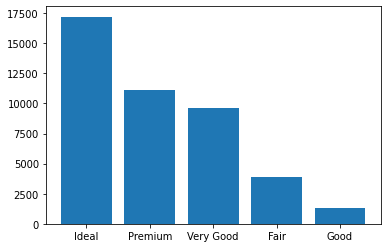

In [13]:
plt.bar(diamond['cut'].unique(),diamond['cut'].value_counts())

<BarContainer object of 8 artists>

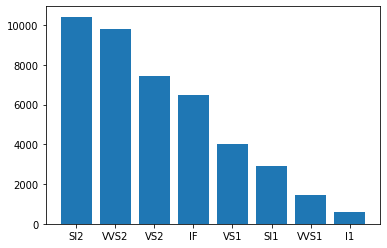

In [14]:
plt.bar(diamond['clarity'].unique(),diamond['clarity'].value_counts())

<BarContainer object of 7 artists>

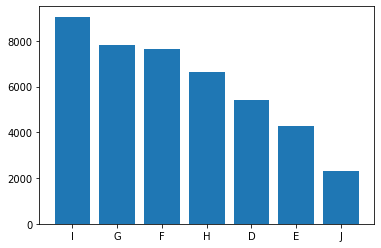

In [15]:
plt.bar(diamond['color'].unique(),diamond['color'].value_counts())

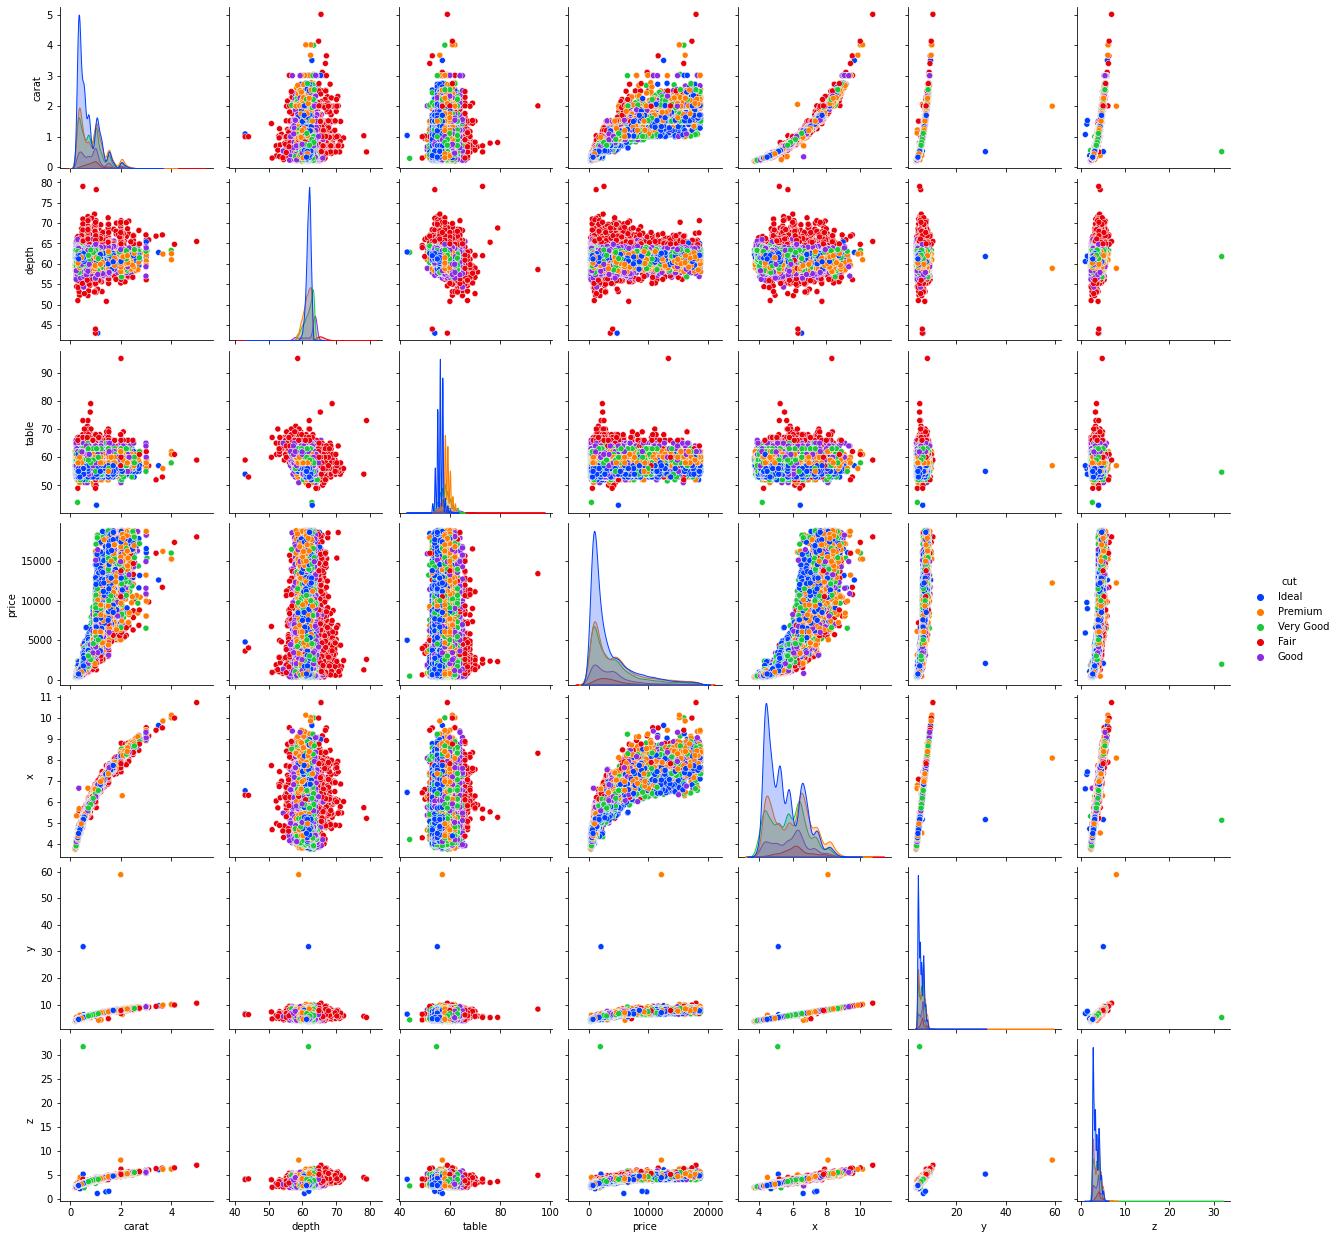

In [16]:
plot=sns.pairplot(diamond,hue='cut',palette='bright')

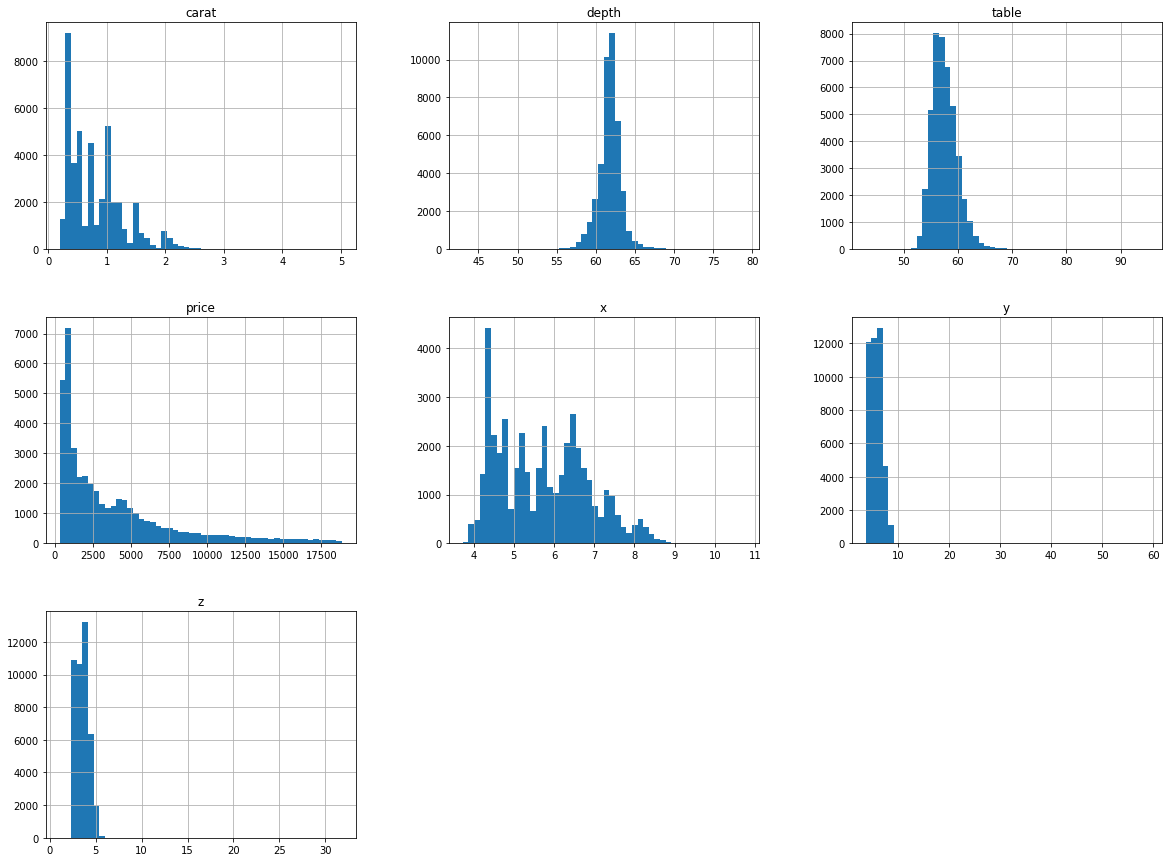

In [17]:
import matplotlib.pyplot as plt
diamond.hist(bins=50, figsize=(20,15));

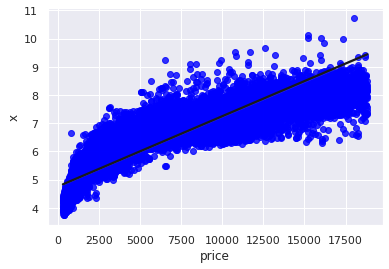

In [18]:
import seaborn as sns; sns.set_theme(color_codes=True)
plot=sns.regplot(x='price',y='x',data=diamond,fit_reg=True,color="blue" ,line_kws={'color':'k'})

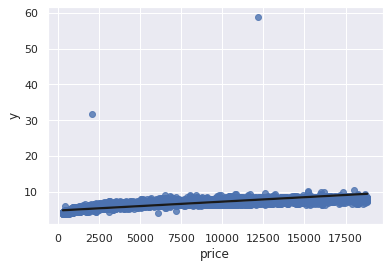

In [19]:
plot=sns.regplot(x='price',y='y',data=diamond,fit_reg=True,line_kws={'color':'k'})

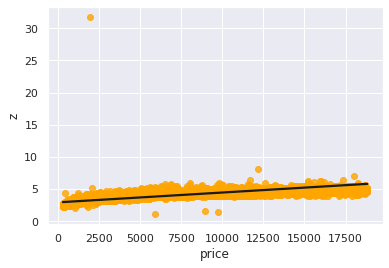

In [20]:
plot=sns.regplot(x='price',y='z',data=diamond,fit_reg=True,color='orange',line_kws={'color':'k'})

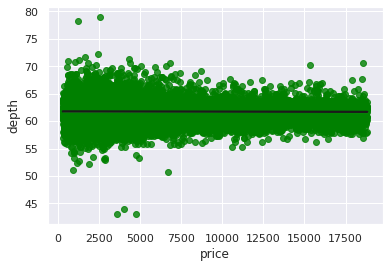

In [21]:
plot=sns.regplot(x='price',y='depth',data=diamond,fit_reg=True,color='green',line_kws={'color':'k'})

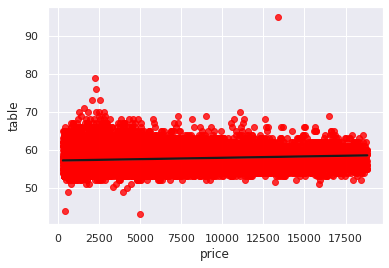

In [22]:
plot=sns.regplot(x='price',y='table',data=diamond,fit_reg=True,color='red',line_kws={'color':'k'})

<div id='4.3'></div>

### 4.3 Drop the OutLiers

In [23]:
diamond = diamond[(diamond["depth"]<75)&(diamond["depth"]>45)]
diamond = diamond[(diamond["table"]<80)&(diamond["table"]>40)]
diamond = diamond[(diamond["x"]<30)]
diamond = diamond[(diamond["y"]<30)]
diamond = diamond[(diamond["z"]<30)&(diamond["z"]>2)]
diamond.shape #12 element deleted

(43123, 10)

<div id='4.4'></div>

### 4.4 Drow Some Plot Categorical Data




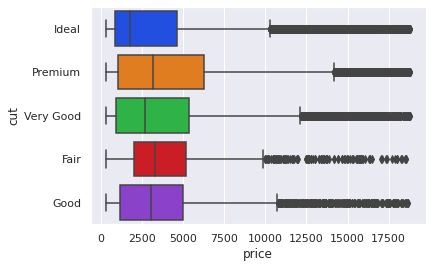

In [24]:
plot=sns.boxplot(x='price',y='cut',palette='bright',data=diamond)

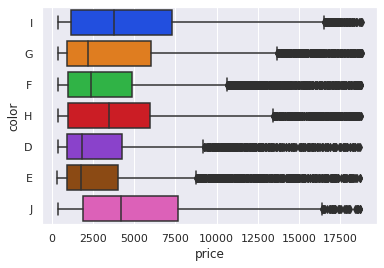

In [25]:
plot=sns.boxplot(x='price',y='color',palette='bright',data=diamond)

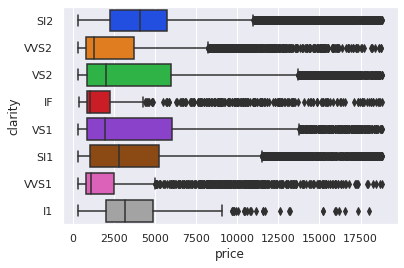

In [26]:
plot=sns.boxplot(x='price',y='clarity',palette='bright',data=diamond)

<div id='Chapter5'></div>

## 5.0 Discover and Visualize the Data to Gain Insights



<div id='5.1'></div>

### 5.1 Stratified Split



In [27]:
#corr_dia = diamond.corr()
#corr_dia["price"].sort_values(ascending=False)

In [28]:
import numpy as np
diamond["carat_cat"] = pd.cut(diamond["carat"],
                       bins=[0., 0.5, 1., 1.5, 2., np.inf],
                       labels=[1, 2, 3, 4, 5])

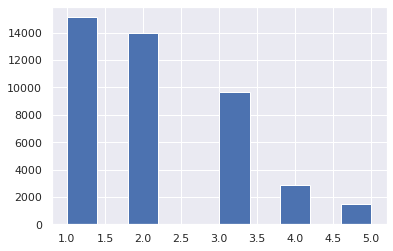

In [29]:
diamond["carat_cat"].hist();

In [30]:
from sklearn.model_selection import StratifiedShuffleSplit

split = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=42)
for train_index, test_index in split.split(diamond, diamond["carat_cat"]):
    strat_train_set = diamond.iloc[train_index]
    strat_test_set = diamond.iloc[test_index]

In [31]:
diamond["carat_cat"].value_counts() / len(diamond)

1    0.350973
2    0.324212
3    0.223848
4    0.066252
5    0.034715
Name: carat_cat, dtype: float64

In [32]:
strat_test_set["carat_cat"].value_counts() / len(strat_test_set)

1    0.350957
2    0.324174
3    0.223884
4    0.066319
5    0.034667
Name: carat_cat, dtype: float64

In [33]:
for set_ in (strat_train_set, strat_test_set):
    set_.drop("carat_cat", axis=1, inplace=True)

/opt/conda/lib/python3.7/site-packages/pandas/core/frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


<div id='5.2'></div>

### 5.2 New Features in DataSet


In [34]:
diamonds=strat_train_set.copy()


In [35]:
diamonds["newDistance"] = diamonds['x']*diamonds['y']*diamonds["z"]

diamonds["volume"] = (diamonds["carat"]*0.2)/ 3.51

In [36]:
diamonds["lenPerCarat"] = diamonds["x"]/diamonds["carat"]
diamonds.head()

,carat,cut,color,clarity,depth,table,price,x,y,z,newDistance,volume,lenPerCarat
25055,0.55,Ideal,E,VVS2,61.4,56.0,2499,5.28,5.31,3.25,91.119600,0.031339,9.600000
34433,1.23,Ideal,H,VS2,62.2,55.0,7130,6.81,6.85,4.25,198.256125,0.070085,5.536585
22183,0.33,Ideal,E,VS2,60.3,57.0,723,4.51,4.54,2.73,55.897842,0.018803,13.666667
8885,1.52,Ideal,I,VS1,62.9,60.0,10214,7.31,7.27,4.59,243.929583,0.086610,4.809211
13198,1.00,Very Good,F,SI1,61.4,60.0,4504,6.35,6.38,3.91,158.405830,0.056980,6.350000


<div id='Chapter6'></div>

## 6.0 Prepare the Data for Machine Learning Algorithms



<div id='6.1'></div>

### 6.1 Handling Text and Categorical Attributes



In [37]:
color_cat = diamonds[["color"]]
from sklearn.preprocessing import OrdinalEncoder
ordinal_encoder = OrdinalEncoder()
color_cat_encoded = ordinal_encoder.fit(color_cat)
color_cat_enc = color_cat_encoded.transform(color_cat)
np.unique(color_cat_enc)
diamonds["newcolor"] = color_cat_enc

In [38]:
diamond_cat = diamonds[["cut","clarity"]]
ordinal_encoder = OrdinalEncoder(categories = [['Fair', 'Good', 'Very Good', 'Premium', 'Ideal'], 
                                              ['I1', 'SI2', 'SI1', 'VS2', 'VS1', 'VVS2', 'VVS1', 'IF']])
diamond_cat_encoded = ordinal_encoder.fit(diamond_cat)
diamond_cat_enc= diamond_cat_encoded.transform(diamond_cat)
clarity_cat_encoder = diamond_cat_enc[0:,1]
cut_cat_encoded = diamond_cat_enc[0:,0]

In [39]:
diamonds["newcut"] = cut_cat_encoded
diamonds["newclarity"] = clarity_cat_encoder

<div id='6.2'></div>

### 6.2 Looking for Correlations

In [40]:
corr_dia = diamonds.corr()
corr_dia["price"].sort_values(ascending=False)

price          1.000000
newDistance    0.923633
carat          0.921575
volume         0.921575
y              0.888393
x              0.886577
z              0.882154
newcolor       0.171130
table          0.126883
depth         -0.013752
newcut        -0.058053
newclarity    -0.146080
lenPerCarat   -0.777661
Name: price, dtype: float64

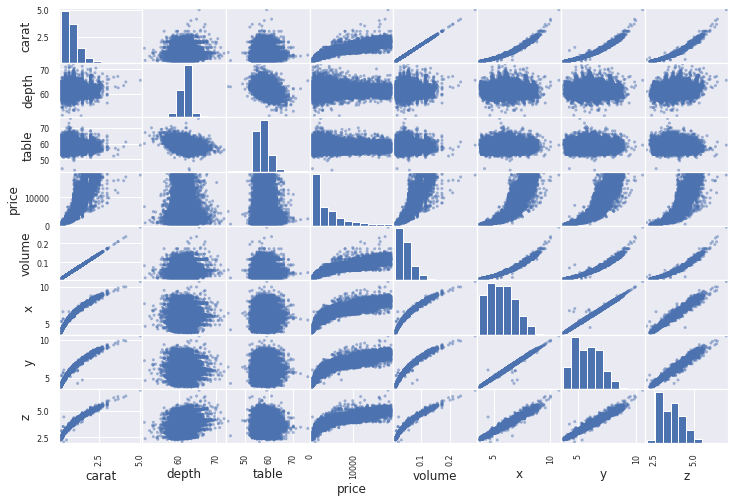

In [41]:
from pandas.plotting import scatter_matrix
attribute = ["carat",	"cut",	"color",	"clarity",	"depth",	"table",	"price","volume",	"x",	"y",	"z"]
scatter_matrix(diamonds[attribute],figsize=(12,8))
plt.show()

<AxesSubplot:xlabel='carat', ylabel='price'>

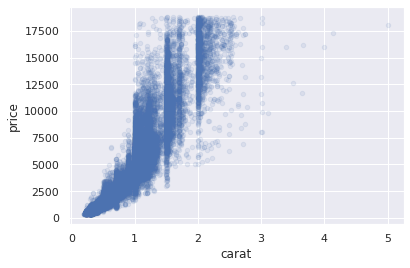

In [42]:
diamonds.plot(kind="scatter",x="carat",y="price",alpha=0.1)
# the correlation between price and carat is very strong ,
# the point is not too dispersed and some how there is no outlires

<AxesSubplot:xlabel='carat', ylabel='x'>

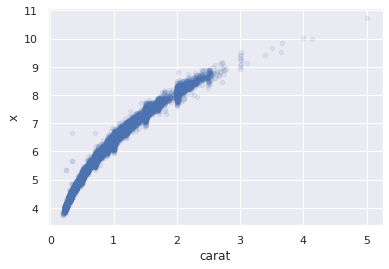

In [43]:
diamonds.plot(kind="scatter",x="carat",y="x",alpha=0.1)

<AxesSubplot:xlabel='lenPerCarat', ylabel='price'>

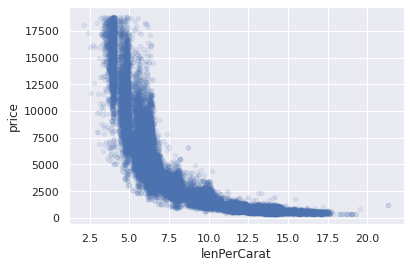

In [44]:
diamonds.plot(kind="scatter",x="lenPerCarat",y="price",alpha=0.1)

In [45]:
print(diamonds['x'].min())
print(diamonds['y'].min())
print(diamonds['z'].min())
# there is no missing vlaue ,So the data set is clean

3.73
3.68
2.06


In [46]:
diamonds.drop(["cut","color","clarity"],axis=1,inplace=True)

<div id='6.3'></div>

### 6.3 Data Scaling

In [47]:
from sklearn.preprocessing import StandardScaler
attribute=["newcolor","newcut","newclarity","price"]
diamondNum=diamonds.drop(attribute,axis=1)
scaler = StandardScaler()
scalerDiamond=scaler.fit(diamondNum)
scaler_Diamond=scalerDiamond.transform(diamondNum)
scaler_Diamond[:10]

array([[-0.52315384, -0.24114325, -0.65850451, -0.40351411, -0.38092477,
        -0.41846765, -0.50623109, -0.52315384,  0.1753239 ],
       [ 0.91395659,  0.31750427, -1.10761948,  0.96329734,  1.00485785,
         1.029008  ,  0.89647925,  0.91395659, -1.01172585],
       [-0.98810133, -1.00928358, -0.20938954, -1.09138653, -1.07381608,
        -1.171155  , -0.9673803 , -0.98810133,  1.36332368],
       [ 1.52684193,  0.80632084,  1.13795538,  1.40996775,  1.38279856,
         1.52114973,  1.49446983,  1.52684193, -1.22421466],
       [ 0.42787512, -0.24114325,  1.13795538,  0.55236056,  0.58192419,
         0.53686628,  0.37472982,  0.42787512, -0.77410215],
       [-1.15717315,  0.17784239, -1.55673446, -1.4933899 , -1.49674973,
        -1.47512488, -1.15404159, -1.15717315,  2.11507435],
       [-1.13603917,  0.17784239, -0.65850451, -1.43085604, -1.47875255,
        -1.43170062, -1.13528165, -1.13603917,  2.01125546],
       [-1.00923531,  0.80632084,  0.23972543, -1.24325447, -1

In [48]:
#from sklearn.model_selection import train_test_split
#x=diamonds.drop(['price'],axis=1)
#y=diamonds['price']
#x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.2,random_state=42)

In [49]:
diamond = diamonds.drop("price", axis=1)
diamond_labels = strat_train_set["price"].copy()

<div id='7.0'></div>

## 7.0 Select and Train a Model



In [50]:
#diam = diamonds.drop("price", axis=1)
#diam_labels = strat_train_set["price"].copy()

<div id='7.1'></div>

### 7.1 Linear Regression model

In [51]:
from sklearn.linear_model import LinearRegression
lin_reg = LinearRegression()
lin_reg.fit(diamond,diamond_labels)

LinearRegression()

In [52]:
from sklearn.metrics import mean_squared_error
diamond_predictions = lin_reg.predict(diamond)
lin_mse = mean_squared_error(diamond_labels, diamond_predictions)
lin_rmse = np.sqrt(lin_mse)

In [53]:
lin_rmse

1178.219988212556

In [54]:
lin_reg.score(diamond,diamond_labels)

0.9129604440810624

<div id='7.2'></div>

### 7.2 Linear model

In [55]:
from sklearn import linear_model
reg = linear_model.BayesianRidge()
reg.fit(diamond,diamond_labels)

BayesianRidge()

In [56]:
reg.score(diamond,diamond_labels)

0.9129596203811606

In [57]:
from sklearn.metrics import mean_squared_error
diamond_predictions = reg.predict(diamond)
reg_mse = mean_squared_error(diamond_labels, diamond_predictions)
reg_rmse = np.sqrt(reg_mse)
reg_rmse

1178.2255632489992

<div id='7.3'></div>

### 7.3 Lasso model

In [58]:
from sklearn.linear_model import Lasso
lasso_reg = Lasso()
lasso_reg.fit(diamond, diamond_labels)
diamondLasso_predictions = lasso_reg.predict(diamond)
lasso_mse = mean_squared_error(diamond_labels, diamondLasso_predictions)
lasso_rmse = np.sqrt(lasso_mse)
lasso_rmse

/opt/conda/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.760e+10, tolerance: 5.502e+07
  coef_, l1_reg, l2_reg, X, y, max_iter, tol, rng, random, positive


1180.1367222346864

In [59]:
lasso_reg.score(diamond, diamond_labels)

0.912677020983398

<div id='7.4'></div>

### 7.4 Decision Tree Regressor model

In [60]:
from sklearn.tree import DecisionTreeRegressor
tree_reg = DecisionTreeRegressor()
tree_reg.fit(diamond, diamond_labels)
diamondTree_predictions = tree_reg.predict(diamond)
tree_mse = mean_squared_error(diamond_labels, diamondTree_predictions)
tree_rmse = np.sqrt(tree_mse)
tree_rmse

5.773544531146158

In [61]:
tree_reg.score(diamond, diamond_labels)

0.9999979099872575

In [62]:
print(tree_reg.predict(diamond[:5]))
np.array(diamond_labels[:5])

[ 2499.  7130.   723. 10214.  4504.]


array([ 2499,  7130,   723, 10214,  4504])

In [63]:
#-----------------------------test_split_data

In [64]:
test_data = strat_test_set.copy()
#test_data.drop(["Id"], axis=1,inplace=True)
test_data["newDistance"] = test_data['x']*test_data['y']*test_data["z"]

test_data["volume"] = (test_data["carat"]*0.2)/ 3.51
test_data["lenPerCarat"] = test_data["x"]/test_data["carat"]
test_data.head()


,carat,cut,color,clarity,depth,table,price,x,y,z,newDistance,volume,lenPerCarat
25382,1.08,Premium,D,SI1,61.6,56.0,5419,6.64,6.57,4.07,177.552936,0.061538,6.148148
32642,0.51,Ideal,E,SI1,62.7,55.0,1438,5.07,5.10,3.19,82.483830,0.029060,9.941176
35954,2.19,Good,I,SI2,63.7,57.0,11522,8.23,8.19,5.23,352.521351,0.124786,3.757991
929,2.19,Good,G,SI1,63.7,56.0,13978,8.26,8.17,5.23,352.942366,0.124786,3.771689
41942,0.33,Ideal,H,IF,61.4,54.0,838,4.47,4.49,2.75,55.193325,0.018803,13.545455


In [65]:
color_cat_0 = test_data[["color"]]
from sklearn.preprocessing import OrdinalEncoder
#ordinal_encoder = OrdinalEncoder()
#color_cat_encoded = ordinal_encoder.fit_transform(color_cat)
color_cat_encod_=color_cat_encoded.transform(color_cat_0)
np.unique(color_cat_encod_)
test_data["newcolor"] = color_cat_encod_

diamond_cat_0 = test_data[["cut","clarity"]]
#ordinal_encoder = OrdinalEncoder(categories = [['Fair', 'Good', 'Very Good', 'Premium', 'Ideal'], 
#                                             ['I1', 'SI2', 'SI1', 'VS2', 'VS1', 'VVS2', 'VVS1', 'IF']])
#diamond_cat_encoded = ordinal_encoder.fit(diamond_cat)
#diamond_cat_enc= diamond_cat_encoded.transform(diamond_cat)
diamond_cat_encod_=diamond_cat_encoded.transform(diamond_cat_0)
clarity_cat_encoder_0 = diamond_cat_encod_[0:,1]
cut_cat_encoded_0= diamond_cat_encod_[0:,0]

test_data["newcut"] = cut_cat_encoded_0
test_data["newclarity"] = clarity_cat_encoder_0

test_data.drop(["cut","color","clarity"],axis=1,inplace=True)

In [66]:
Test = test_data.drop("price", axis=1)
Test_labels = strat_test_set["price"].copy()

In [67]:
from sklearn.preprocessing import StandardScaler
attribute_0=["newcolor","newcut","newclarity"]
test_Num=Test.drop(attribute_0,axis=1)
scaler_test_=scalerDiamond.transform(test_Num)
scaler_test_[:10]

array([[ 0.59694694, -0.10148137, -0.65850451,  0.8114294 ,  0.75289737,
         0.76846238,  0.62541785,  0.59694694, -0.83306935],
       [-0.60768975,  0.66665896, -1.10761948, -0.59111568, -0.56989512,
        -0.50531619, -0.61929695, -0.60768975,  0.27499216],
       [ 2.94281838,  1.36496836, -0.20938954,  2.23184129,  2.2106687 ,
         2.44753415,  2.91623328,  2.94281838, -1.5313086 ],
       [ 2.94281838,  1.36496836, -0.65850451,  2.25864152,  2.19267152,
         2.44753415,  2.92174552,  2.94281838, -1.52730681],
       [-0.98810133, -0.24114325, -1.55673446, -1.12712016, -1.11880902,
        -1.14220548, -0.97660436, -0.98810133,  1.32791385],
       [-1.00923531,  0.10801145, -1.10761948, -1.20752084, -1.16380196,
        -1.171155  , -1.00413143, -1.00923531,  1.36940974],
       [-0.31181407, -1.28860734,  0.23972543, -0.09084482, -0.03897841,
        -0.21582106, -0.2773958 , -0.31181407, -0.09882989],
       [-0.26954612,  0.17784239,  0.23972543, -0.11764505, -0

In [68]:
print(tree_reg.predict(Test[:5]))
np.array(Test_labels[:5])

[ 5767.  1343. 11756. 17816.   838.]


array([ 5419,  1438, 11522, 13978,   838])

<div id='7.5'></div>

### 7.5 Random Forest Regressor model

In [69]:
from sklearn.ensemble import RandomForestRegressor
forest_reg = RandomForestRegressor()
forest_reg.fit(diamond, diamond_labels)
diamondForest_predictions = forest_reg.predict(diamond)
forest_mse = mean_squared_error(diamond_labels, diamondForest_predictions)
forest_rmse = np.sqrt(forest_mse)

In [70]:
forest_rmse

202.30283945018485

In [71]:
forest_reg.score(diamond, diamond_labels)

0.9974339338304147

In [72]:
print(forest_reg.predict(diamond[:5]))
np.array(diamond_labels[:5])

[ 2530.1   7289.36   752.34 10053.56  4636.89]


array([ 2499,  7130,   723, 10214,  4504])

In [73]:
print(forest_reg.predict(Test[:10]))
np.array(Test_labels[:10])

[ 5968.87  1412.06 12762.08 16641.53   849.87   940.44  3685.89  1781.96
  2586.98  1719.55]


array([ 5419,  1438, 11522, 13978,   838,   918,  3056,  1673,  2202,
        1815])

<div id='8.0'></div>

## 8.0 Fine-Tune Your Model



In [74]:
from sklearn.model_selection import cross_val_score

scores = cross_val_score(forest_reg,diamond,diamond_labels,scoring="neg_mean_squared_error", cv=10)
forestReg_rmse_scores = np.sqrt(-scores)

In [75]:
forestReg_rmse_scores

array([555.68082344, 529.3217866 , 536.21362994, 553.94579284,
       548.47502832, 556.40764679, 525.84923993, 540.06379321,
       580.5068508 , 524.9886686 ])

In [76]:
def display_scores(scores):
  print("Scores:", scores)
  print("Mean:", scores.mean())
  print("Standard deviation:", scores.std())

In [77]:
display_scores(forestReg_rmse_scores)

Scores: [555.68082344 529.3217866  536.21362994 553.94579284 548.47502832
 556.40764679 525.84923993 540.06379321 580.5068508  524.9886686 ]
Mean: 545.1453260469206
Standard deviation: 16.466391499244295


<div id='9.0'></div>

## 9.0 Evaluate Your System on the Test Set

In [78]:
test = test_df.copy()
#test=test.drop(test[test["x"]==0].index)
#test =test.drop(test[test["y"]==0].index)
#test =test.drop(test[test["z"]==0].index)
#test.shape

In [79]:
test.drop(["Id"], axis=1,inplace=True)

In [80]:
#test = test[(test["depth"]<75)&(test["depth"]>45)]
#test = test[(test["table"]<80)&(test["table"]>40)]
#test = test[(test["x"]<30)]
#test = test[(test["y"]<30)]
#test = test[(test["z"]<30)&(test["z"]>2)]
#test.shape 

In [81]:
test["newDistance"] = test['x']*test['y']*test["z"]

test["volume"] = (test["carat"]*0.2)/ 3.51

In [82]:
test["lenPerCarat"] = test["x"]/test["carat"]
test.head()

,carat,cut,color,clarity,depth,table,x,y,z,newDistance,volume,lenPerCarat
0,0.34,Ideal,G,VVS2,61.1,57.0,4.52,4.48,2.75,55.686400,0.019373,13.294118
1,0.71,Premium,E,VS2,62.7,58.0,5.74,5.68,3.58,116.719456,0.040456,8.084507
2,0.44,Very Good,I,VS1,62.8,56.0,4.83,4.88,3.05,71.889720,0.025071,10.977273
3,0.81,Premium,E,SI2,60.1,59.0,6.09,6.03,3.65,134.037855,0.046154,7.518519
4,0.40,Ideal,G,VVS1,61.2,56.0,4.74,4.80,2.92,66.435840,0.022792,11.850000


In [83]:
color_cat_ = test[["color"]]
from sklearn.preprocessing import OrdinalEncoder
#ordinal_encoder = OrdinalEncoder()
#color_cat_encoded = ordinal_encoder.fit_transform(color_cat)
color_cat_encod=color_cat_encoded.transform(color_cat_)
np.unique(color_cat_encod)
test["newcolor"] = color_cat_encod

In [84]:
diamond_cat_ = test[["cut","clarity"]]
#ordinal_encoder = OrdinalEncoder(categories = [['Fair', 'Good', 'Very Good', 'Premium', 'Ideal'], 
#                                             ['I1', 'SI2', 'SI1', 'VS2', 'VS1', 'VVS2', 'VVS1', 'IF']])
#diamond_cat_encoded = ordinal_encoder.fit(diamond_cat)
#diamond_cat_enc= diamond_cat_encoded.transform(diamond_cat)
diamond_cat_encod=diamond_cat_encoded.transform(diamond_cat_)
clarity_cat_encoder_ = diamond_cat_encod[0:,1]
cut_cat_encoded_ = diamond_cat_encod[0:,0]

In [85]:
test["newcut"] = cut_cat_encoded_
test["newclarity"] = clarity_cat_encoder_

In [86]:
test.drop(["cut","color","clarity"],axis=1,inplace=True)

In [87]:
from sklearn.preprocessing import StandardScaler
attribute_=["newcolor","newcut","newclarity"]
testNum=test.drop(attribute_,axis=1)
scaler_test=scalerDiamond.transform(testNum)
scaler_test[:10]

array([[-0.96696736, -0.45063607, -0.20938954, -1.08245312, -1.12780761,
        -1.14220548, -0.97014866, -0.96696736,  1.25449052],
       [-0.18501021,  0.66665896,  0.23972543,  0.00742267, -0.04797699,
         0.05919931, -0.17105891, -0.18501021, -0.26739871],
       [-0.75562759,  0.7364899 , -0.65850451, -0.80551747, -0.76786407,
        -0.70796279, -0.75800285, -0.75562759,  0.57766809],
       [ 0.02632956, -1.14894546,  0.68884041,  0.32009195,  0.2669736 ,
         0.16052261,  0.05568634,  0.02632956, -0.43274155],
       [-0.84016349, -0.38080513, -0.65850451, -0.88591815, -0.83985278,
        -0.89613462, -0.82940906, -0.84016349,  0.83261886],
       [ 0.9984925 , -0.10148137, -1.10761948,  1.10623187,  1.16683244,
         1.11585654,  1.06576829,  0.9984925 , -1.02586394],
       [ 0.4490091 , -0.17131231, -0.65850451,  0.60596101,  0.66291149,
         0.60924006,  0.45100892,  0.4490091 , -0.77511448],
       [ 0.93509057,  2.20293963,  1.13795538,  0.86502985,  0

In [88]:
diamondNum.columns

Index(['carat', 'depth', 'table', 'x', 'y', 'z', 'newDistance', 'volume',
       'lenPerCarat'],
      dtype='object')

In [89]:
testNum.columns

Index(['carat', 'depth', 'table', 'x', 'y', 'z', 'newDistance', 'volume',
       'lenPerCarat'],
      dtype='object')

In [90]:
prediction=pd.Series(forest_reg.predict(test))
pred=pd.DataFrame({"Id":test_df['Id'],'price':prediction})

In [91]:
pred.to_csv('submission.csv',index=False,header = 1)